In [196]:
# Libraries
from nltk.util import pr
import pandas as pd #Untuk mengimport data/file (csv, dll) dari sumber luar
import numpy as np #mengelola komputasi matrix
import re #reguler expression
import matplotlib.pyplot as plt #persentasi data berupa grafik/plot
import string
from bs4 import BeautifulSoup
import nltk
import pickle 
from nltk.corpus import stopwords
from nltk import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re

# tqdm - progress bar library
from tqdm import tqdm

In [197]:
data = pd.read_csv('C:/Users/sinag/SKRIPSIKU/X_pohon.csv', sep = ',', encoding ='utf-8')
data.head()

,text,sentimen
0,penting rata jangan salah sasaran jangan dekat...,positif
1,sejahtera cuma pejabat negara,netral
2,rakyat indonesia nakal dasar udik malah libura...,positif
3,vaksin amerika kurang laku terutama daerah dik...,netral
4,pentingnya pengawasan melakukan audit investig...,positif


In [198]:
data.shape

(107, 2)

In [199]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import csv

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text'].astype('U'))

tfidf = TfidfVectorizer()
tf_idf = tfidf.fit_transform(data['text'].astype('U'))
df = pd.DataFrame(tf_idf.toarray(), columns=tfidf.get_feature_names())
df.to_csv('C:/Users/sinag/SKRIPSIKU/ff_idf.csv', index=False)
tf_idf = pd.read_csv('C:/Users/sinag/SKRIPSIKU/ff_idf.csv', encoding='latin1')
tf_idf.head()

,abal,acung,ada,adakan,adanya,adil,ahli,air,akhirnya,akibat,...,wakil,walikota,warga,warganya,waspada,yakin,yaman,youtube,zalim,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.160952,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


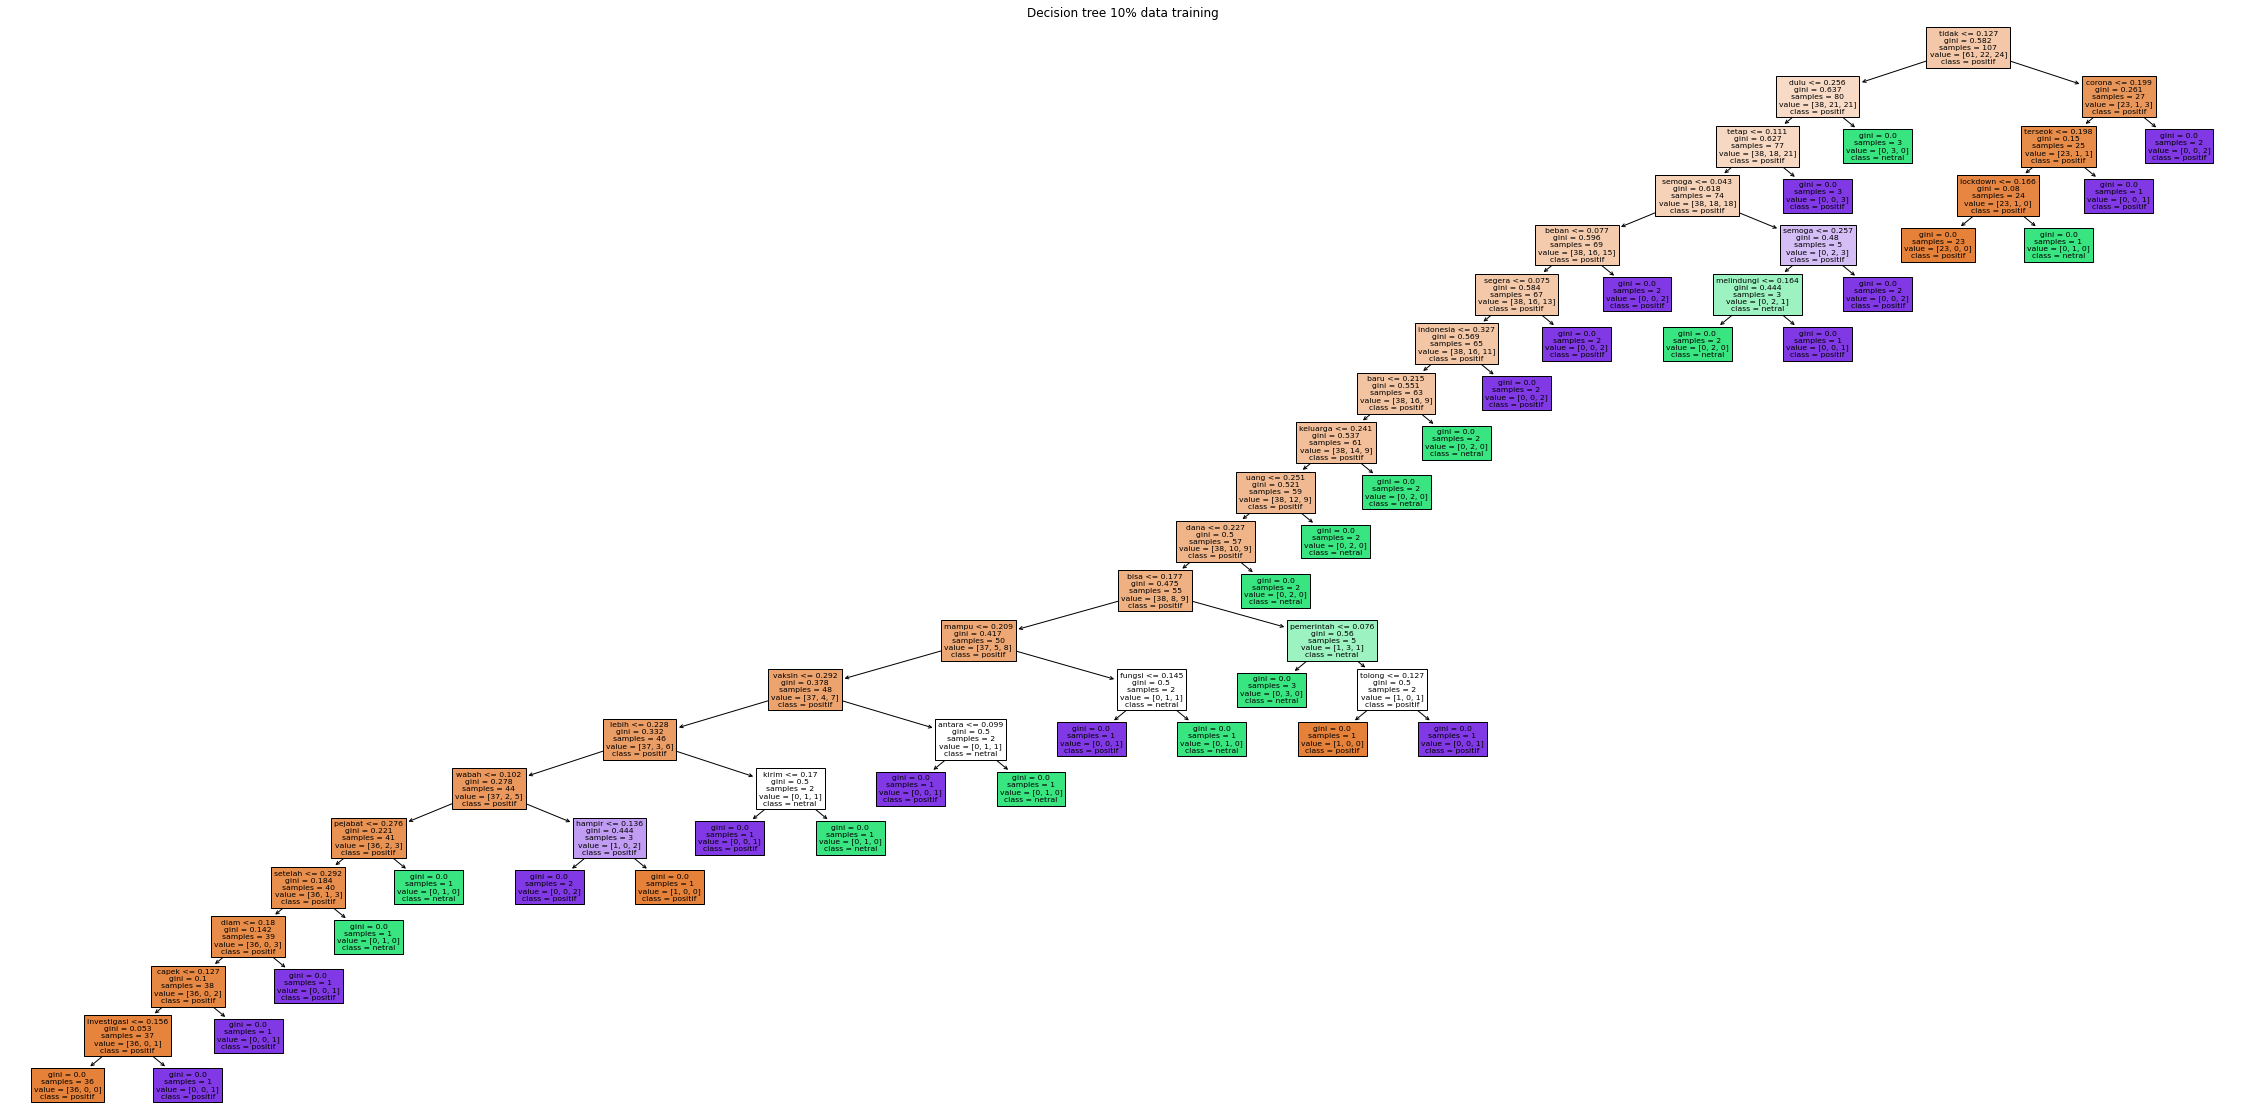

In [201]:
# importing the plot tree method
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(tf_idf, data['sentimen'])
cn = data.sentimen
plot_tree(clf, feature_names = tf_idf.columns, class_names = cn, filled=True)
plt.title("Decision tree 10% data training")
plt.show()

In [ ]:
value = [positif,netral,negatif]

In [ ]:
plt.savefig('tree.png')

In [ ]:
['abal', 'acung', 'ada', 'adakan', 'adanya', 'adil', 'ahli', 'air', 'akhirnya', 'akibat', 'akses', 'ala', 'alat', 'aman', 'ambil', 'amerika', 'ampuh', 'anak', 'aneh', 'anggap', 'anggaran', 'anggota', 'angkuh', 'anjing', 'antara', 'antisipasi', 'apapun', 'asal', 'asean', 'asia', 'asing', 'aspal', 'aturan', 'audit', 'awal', 'bagaimana', 'bagi', 'bagikan', 'bagus', 'bagusnya', 'bahaya', 'baik', 'bakalan', 'balai', 'banding', 'bandung', 'bangun', 'bank', 'bantu', 'bantuan', 'banyak', 'bapak', 'barat', 'baru', 'bawah', 'bayar', 'beban', 'bebas', 'beberapa', 'begal', 'begini', 'beginilah', 'belajar', 'beli', 'belum', 'benar', 'bentuk', 'berakhir', 'berarti', 'berat', 'berbagi', 'berbahaya', 'berdampak', 'berdiri', 'berdoa', 'berduyun', 'berefek', 'beres', 'berhak', 'berharap', 'berhenti', 'berhentikan', 'beri', 'beribadah', 'berita', 'berkaca', 'berkeliling', 'bermain', 'bermanfaat', 'bersama', 'bersatu', 'bersyukur', 'besar', 'betul', 'biadab', 'biar', 'biarin', 'biasanya', 'bicara', 'bident', 'bikin', 'bila', 'bilang', 'bisa', 'bisnis', 'bisnisnya', 'bogor', 'bohong', 'boleh', 'bosan', 'buat', 'budak', 'bukan', 'buktinya', 'bulan', 'bulu', 'bumi', 'bunuh', 'bupati', 'buruh', 'butuh', 'capek', 'cara', 'caranya', 'cari', 'cepat', 'ceria', 'cerita', 'cina', 'cinta', 'corona', 'covid', 'cukupi', 'cuma', 'daerah', 'daerahnya', 'dagelan', 'dalih', 'dana', 'dapat', 'darahnya', 'darurat', 'dasar', 'data', 'datang', 'debat', 'dekat', 'demi', 'dengar', 'depan', 'desa', 'diam', 'diambil', 'diawasi', 'dibayar', 'diberi', 'dibiarin', 'dicegah', 'didesa', 'diharapkan', 'dijanjikan', 'dikuasai', 'dilanjutin', 'dilihatnya', 'dimakan', 'dingin', 'diperiksa', 'dirumahkan', 'disabilitas', 'disalurkan', 'disinfektan', 'disini', 'disuruh', 'ditambah', 'ditimbang', 'ditunjuk', 'dokter', 'dpr', 'duitnya', 'dulu', 'ekonomi', 'enak', 'film', 'foto', 'fungsi', 'gagal', 'gampang', 'ganti', 'gejala', 'gelombang', 'giliran', 'gimana', 'gitu', 'golongan', 'gubernur', 'guna', 'gunakan', 'gusti', 'habis', 'haknya', 'halus', 'halusinasi', 'hampir', 'hancur', 'hangat', 'hanya', 'hapus', 'harapan', 'hari', 'harian', 'harus', 'hati', 'hidup', 'hidupnya', 'hilang', 'hilangkanlah', 'hindari', 'hingga', 'hutang', 'ide', 'ikut', 'ilmu', 'ilmuwan', 'iming', 'india', 'indonesia', 'indra', 'ingat', 'ingin', 'ingkar', 'investigasi', 'iri', 'istirahat', 'jabodetabek', 'jadi', 'jadilah', 'jaga', 'jalan', 'jam', 'jamin', 'jangan', 'janji', 'jarak', 'jatuh', 'jawa', 'jelas', 'jelaskan', 'jempol', 'jengkel', 'jiwa', 'jokowi', 'jompo', 'jual', 'jujur', 'juta', 'kabar', 'kadang', 'kala', 'kampung', 'kapal', 'kapan', 'kapasitas', 'kartu', 'karyawan', 'kasih', 'kasihan', 'katanya', 'kaya', 'kayaknya', 'keadaan', 'keadilan', 'keamanan', 'kebaikan', 'kebanyakan', 'kebocoran', 'kebutuhan', 'kecil', 'kehabisan', 'kehilangan', 'kelaparan', 'keluar', 'keluarga', 'keluarganya', 'keluarkan', 'kemana', 'kemanakan', 'kematian', 'kembali', 'kemiskinan', 'kena', 'kencang', 'kenyang', 'kenyataan', 'kepada', 'keringat', 'kerja', 'kerjaan', 'kerjanya', 'kesehatan', 'kesejahteraan', 'ketahuilah', 'ketakutan', 'ketawa', 'ketegasan', 'ketika', 'keuangan', 'khusus', 'kirim', 'komunis', 'kontra', 'kontrak', 'korban', 'korupsi', 'koruptor', 'korut', 'kosong', 'kotor', 'ktp', 'kuat', 'kuncinya', 'kurang', 'laboratorium', 'laku', 'langsung', 'lapangan', 'larang', 'laut', 'layak', 'lebih', 'lekas', 'lelang', 'leluasa', 'lemah', 'lepas', 'liburan', 'liburkan', 'lihat', 'lingkungan', 'liter', 'lockdown', 'luar', 'luas', 'lucu', 'macam', 'mainnya', 'maju', 'makan', 'makanan', 'makin', 'maksudnya', 'malah', 'malam', 'mama', 'mampu', 'mana', 'mandilah', 'mantap', 'manusia', 'marxisme', 'masalah', 'masih', 'masjid', 'masker', 'masuk', 'masyarakat', 'mata', 'mati', 'mau', 'maupun', 'mayat', 'medis', 'melakukan', 'melepaskan', 'melindungi', 'melongo', 'memakai', 'membaik', 'membandel', 'membantu', 'memberikan', 'membuka', 'membutuhkan', 'memenuhi', 'memerangi', 'memeriksa', 'mempercayai', 'menambah', 'menangani', 'menanggulangi', 'mencari', 'mencegah', 'mencegahnya', 'mendengar', 'mending', 'menengah', 'menerapkan', 'menerima', 'mengadakan', 'mengadu', 'mengeluarkan', 'mengerahkan', 'menghamburkan', 'menghancurkan', 'meningkat', 'meningkatkan', 'menjadi', 'menjaga', 'menjerit', 'menteri', 'menuntut', 'menurut', 'menyalahkan', 'menyampaikan', 'menyaring', 'menyebar', 'menyelamatkan', 'menyemprotkan', 'merantau', 'merasakan', 'merata', 'mikir', 'mimpi', 'minggu', 'minimal', 'minta', 'minum', 'minuman', 'misal', 'miskin', 'mohon', 'mudah', 'mudahan', 'mudik', 'muka', 'mula', 'mulai', 'mulut', 'mungkin', 'murni', 'muslim', 'nafkah', 'nakal', 'namanya', 'nanti', 'negara', 'negeri', 'nonaktifkan', 'nonton', 'normal', 'numpang', 'nyaris', 'nyata', 'nyinyir', 'obat', 'obati', 'omong', 'orang', 'otg', 'pabrik', 'pagi', 'pak', 'pakai', 'pandang', 'pandemi', 'panjang', 'panjangnya', 'pantas', 'para', 'parkir', 'partai', 'pasien', 'pasokan', 'pasti', 'pebisnis', 'pedagang', 'peduli', 'pejabat', 'pelan', 'pemakai', 'pemecah', 'pemerintah', 'pemimpin', 'penanganan', 'pencegahan', 'pendataan', 'penduduknya', 'pengawasan', 'penghasilan', 'pengurangan', 'pengurus', 'penonton', 'penting', 'pentingnya', 'penuh', 'penularan', 'penyakit', 'penyekatan', 'perang', 'peraturan', 'percaya', 'percekcokan', 'perekonomian', 'perhatian', 'periksa', 'perkara', 'perlu', 'pernah', 'pertama', 'perut', 'pesawat', 'petugas', 'pikir', 'pilih', 'pilihan', 'pintu', 'pohon', 'pokok', 'pokoknya', 'politik', 'ppkm', 'praktik', 'presiden', 'preventif', 'pro', 'program', 'protokol', 'psbb', 'pulang', 'pulih', 'puncak', 'punya', 'pusat', 'puskesmas', 'rakyat', 'rakyatnya', 'ramadhan', 'rapid', 'rasa', 'rata', 'raup', 'rekor', 'remeh', 'rezim', 'ribu', 'ringan', 'rt', 'rumah', 'rutin', 'rw', 'saat', 'sadar', 'sakit', 'sakitnya', 'salah', 'salahnya', 'saling', 'sama', 'sampah', 'sampai', 'sampel', 'sana', 'sangka', 'sanksi', 'sarannya', 'sasaran', 'satu', 'saudaraku', 'sebagai', 'sebagian', 'sebaliknya', 'sebanyak', 'sebelum', 'sebentar', 'secara', 'sedang', 'sedangkan', 'sedia', 'sediakan', 'sedikit', 'seenaknya', 'segera', 'sehangat', 'sehari', 'seharusnya', 'sehat', 'sehingga', 'seiman', 'sejahtera', 'sekali', 'sekarang', 'sekeluarga', 'sekolah', 'selagi', 'selanjutnya', 'selesai', 'seluruh', 'sembako', 'sementara', 'semoga', 'semua', 'senang', 'seperti', 'sering', 'serius', 'setelah', 'setoran', 'setuju', 'sia', 'siapa', 'sikap', 'sisa', 'sistem', 'soalnya', 'sombong', 'sore', 'sosial', 'strategi', 'sudah', 'suhu', 'suka', 'sumatera', 'sumber', 'suntik', 'supaya', 'suplai', 'suruh', 'susah', 'swab', 'tahan', 'tahu', 'tahun', 'tajam', 'tangan', 'tantang', 'tanya', 'tegak', 'tegas', 'teguh', 'tempat', 'tenaga', 'tenggara', 'tepat', 'terapkan', 'terbagi', 'tergantung', 'terima', 'terindikasi', 'terinfeksi', 'terjadi', 'terkaya', 'terlihat', 'termasuk', 'termiskin', 'ternyata', 'terpapar', 'terputusnya', 'tersadar', 'tersebar', 'terseok', 'tertular', 'terutama', 'tes', 'tetangga', 'tetap', 'tidak', 'tiga', 'tipu', 'tolol', 'tolong', 'tonton', 'triliun', 'trump', 'tsunami', 'tubuh', 'tuhan', 'tujuan', 'tukang', 'tunai', 'tunggu', 'tutup', 'uang', 'udah', 'udara', 'udik', 'ujung', 'ulah', 'umat', 'upaya', 'urus', 'urusan', 'usaha', 'utang', 'vaksin', 'video', 'virus', 'wabah', 'wajar', 'wakil', 'walikota', 'warga', 'warganya', 'waspada', 'yakin', 'yaman']

In [ ]:
df.to_csv('C:/Users/sinag/SKRIPSIKU/f_idf.csv', index=False)
tf_idf = pd.read_csv('C:/Users/sinag/SKRIPSIKU/f_idf.csv', encoding='latin1')
tf_idf.head()